In [ ]:
import pandas as pd
import numpy as np
import plotly as pt
import seaborn as sns
!pip install pymatgen
!pip install mp_api
import requests
import json


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/University/Artificial intelligence in chemistry/Perovskite project/Perovskite-liked-oxides-bandgap-prediction/Data/Perovskite dataset.xlsx",sheet_name='Export')

In [ ]:
df

Perovskite          Hill formula Interlayer space composition Dopant  \
0        K4Nb6O17            K4 Nb6 O17                          NaN    NaN   
1        KLaNb2O7           K La Nb2 O7                          NaN    NaN   
2       RbLaNb2O7          La Nb2 O7 Rb                          NaN    NaN   
3       CsLaNb2O7          Cs La Nb2 O7                          NaN    NaN   
4      KCa2Nb3O10         Ca2 K Nb3 O10                          NaN    NaN   
..            ...                   ...                          ...    ...   
519     Bi4Ti3O12  C8 Ca2 H20 N Nb3 O10                          NaN     Pt   
520    KCa2Nb3O10                   NaN                          NaN    NaN   
521  KCa2Nb2TaO10                   NaN                          NaN    NaN   
522  KCa2NbTa2O10                   NaN                          NaN    NaN   
523    KCa2Ta3O10                   NaN                          NaN    NaN   

     Dopant, wt%  Bandgap, eV                 DOI Materials Project ID  \
0            NaN         3.50  10.1007/BF00765319            mp-560692   
1            NaN         3.20  10.1007/BF00765319           mp-1223501   
2            NaN         3.35  10.1007/BF00765319            mp-553965   
3            NaN         3.30  10.1007/BF00765319            mp-553248   
4            NaN         3.35  10.1007/BF00765319            mp-557195   
..           ...          ...                 ...                  ...   
519          1.0         3.61                   *                   -1   
520          NaN         3.50                 NaN                  NaN   
521          NaN         3.60                 NaN                  NaN   
522          NaN         3.80                 NaN                  NaN   
523          NaN         4.20                 NaN                  NaN   

      COD_ID Springer_ID  ...  frac s valence electrons  \
0    1001842         NaN  ...                  0.323529   
1    1545643         NaN  ...                  0.339286   
2         -1         NaN  ...                  0.339286   
3    2004917         NaN  ...                  0.339286   
4    1521061         NaN  ...                  0.350000   
..       ...         ...  ...                       ...   
519       -1         NaN  ...                  0.477941   
520      NaN         NaN  ...                       NaN   
521      NaN         NaN  ...                       NaN   
522      NaN         NaN  ...                       NaN   
523      NaN         NaN  ...                       NaN   

     frac p valence electrons frac d valence electrons  \
0                    0.500000                 0.176471   
1                    0.500000                 0.160714   
2                    0.500000                 0.160714   
3                    0.500000                 0.160714   
4                    0.500000                 0.150000   
..                        ...                      ...   
519                  0.433824                 0.088235   
520                       NaN                      NaN   
521                       NaN                      NaN   
522                       NaN                      NaN   
523                       NaN                      NaN   

    frac f valence electrons MagpieData minimum Electronegativity  \
0                        0.0                                 0.82   
1                        0.0                                 0.82   
2                        0.0                                 0.82   
3                        0.0                                 0.79   
4                        0.0                                 0.82   
..                       ...                                  ...   
519                      0.0                                 1.00   
520                      NaN                                  NaN   
521                      NaN                                  NaN   
522                      NaN                                  NaN   
523 

In [ ]:
df.describe()

Dopant, wt%  Bandgap, eV          Z        Z_MP        a_MP  \
count    42.000000   524.000000  13.000000  520.000000  520.000000   
mean      1.512024     3.392823   1.769231    1.432692    3.098752   
std       1.266262     0.624515   2.047513    5.117435    4.732983   
min       0.220000     0.010000   1.000000    0.000000    0.000000   
25%       0.725000     3.100000   1.000000    0.000000    0.000000   
50%       1.000000     3.440000   1.000000    0.000000    0.000000   
75%       1.550000     3.762500   1.000000    1.000000    5.626988   
max       4.300000     5.500000   8.000000   50.000000   22.855297   

             b_MP        c_MP  Valence electrons       Volume  \
count  199.000000  199.000000         520.000000   520.000000   
mean     8.098467   13.396025          18.422212   175.493702   
std      3.973765    6.397271           7.919057   376.263443   
min      2.924839    3.442262           0.000000     0.000000   
25%      3.951370   10.486176          14.000000     0.000000   
50%      7.415443   11.929214          20.000000     0.000000   
75%     11.305390   15.281157          20.000000   215.964102   
max     20.551678   48.809404          54.000000  2502.916739   

       Valence Electrons Density  ...  frac s valence electrons  \
count                 188.000000  ...                520.000000   
mean                    0.088132  ...                  0.323632   
std                     0.015489  ...                  0.092896   
min                     0.000000  ...                  0.118343   
25%                     0.084406  ...                  0.246434   
50%                     0.086993  ...                  0.339286   
75%                     0.094480  ...                  0.393348   
max                     0.188222  ...                  0.568182   

       frac p valence electrons  frac d valence electrons  \
count                520.000000                520.000000   
mean                   0.412607                  0.138737   
std                    0.095002                  0.103683   
min                    0.000000                  0.021978   
25%                    0.327869                  0.073770   
50%                    0.441392                  0.107143   
75%                    0.500000                  0.161071   
max                    0.567164                  0.833333   

       frac f valence electrons  MagpieData minimum Electronegativity  \
count                520.000000                            520.000000   
mean                   0.125024                              1.031942   
std                    0.149504                              0.249420   
min                    0.000000                              0.790000   
25%                    0.000000                              0.820000   
50%                    0.000000                              0.950000   
75%                    0.280000                              1.100000   
max                    0.382022                              2.020000   

       MagpieData maximum Electronegativity  \
count                            520.000000   
mean                               3.419865   
std                                0.178739   
min                                1.690000   
25%                                3.440000   
50%                                3.440000   
75%                                3.440000   
max                                3.440000   

       MagpieData range Electronegativity  MagpieData mean Electronegativity  \
count                          520.000000                         520.000000   
mean                             2.387923                           2.647099   
std                              0.345293                           0.160482   
min                              0.040000                           1.654000   
25%                              2.340000                           2.571885   
50%                              2.490000                           2.6486

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Perovskite                            524 non-null    object 
 1   Hill formula                          520 non-null    object 
 2   Interlayer space composition          3 non-null      object 
 3   Dopant                                53 non-null     object 
 4   Dopant, wt%                           42 non-null     float64
 5   Bandgap, eV                           524 non-null    float64
 6   DOI                                   520 non-null    object 
 7   Materials Project ID                  520 non-null    object 
 8   COD_ID                                520 non-null    object 
 9   Springer_ID                           36 non-null     object 
 10  Z                                     13 non-null     float64
 11  Z_MP               

In [ ]:
df.columns

Index(['Perovskite', 'Hill formula', 'Interlayer space composition', 'Dopant',
       'Dopant, wt%', 'Bandgap, eV', 'DOI', 'Materials Project ID', 'COD_ID',
       'Springer_ID', 'Z', 'Z_MP', 'a, A', 'b, A', 'c, A', 'Symmetry group',
       'd,A', 'a_MP', 'b_MP', 'c_MP', 'XRD pattern', 'Crystal structure',
       'Number of octahedrons on a layer', 'Valence electrons', 'Volume',
       'Valence Electrons Density', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
       'MagpieData mean Electronegativity',
       'Average Pauling electronegativity',
       'Average Mulliken electronegativity'],
      dtype='object')

## Dealing with duplicates

In [ ]:
df_numeric = df[['Perovskite', 'Bandgap, eV', 'a, A', 'b, A', 'c, A']]
df_numeric
#df_grouped = df_numeric .groupby('Perovskite').mean().reset_index()
#df_grouped.sort_values('Bandgap, eV')
#df_grouped

Perovskite  Bandgap, eV    a, A    b, A    c, A
0        K4Nb6O17         3.50     NaN     NaN     NaN
1        KLaNb2O7         3.20   7.806   7.668   21.54
2       RbLaNb2O7         3.35   3.885   3.885  10.989
3       CsLaNb2O7         3.30   3.905   3.905  11.185
4      KCa2Nb3O10         3.35   7.727   7.727  29.466
..            ...          ...     ...     ...     ...
519     Bi4Ti3O12         3.61  3.8875  3.8875  34.478
520    KCa2Nb3O10         3.50    3.86    3.86    29.5
521  KCa2Nb2TaO10         3.60    3.85    3.85    29.5
522  KCa2NbTa2O10         3.80    3.88    3.88    29.8
523    KCa2Ta3O10         4.20    3.86    3.86    29.8

[524 rows x 5 columns]

In [ ]:
df_grouped = df_numeric .groupby('Perovskite').mean().reset_index()
#df_grouped.sort_values('Bandgap, eV')
df_grouped

TypeError: agg function failed [how->mean,dtype->object]

##One variable destribution

In [ ]:
import plotly.express as px
def plot_destribution(df,column):
  #fig = px.histogram(df, x=column,nbins=40,width=800, height=600, title=column)
  fig = px.violin(df, x=column,width=800, height=600, title=column)
  fig.update_layout(font_size=20)
  fig.show()
def plot_histogram(df,column):
  fig = px.histogram(df, x=column,nbins=10,width=800, height=600, title=column)
  fig.update_layout(font_size=20)
  fig.show()

In [ ]:
plot_histogram(df_grouped,'Bandgap, eV')
plot_histogram(df_grouped,'a, A')
plot_histogram(df_grouped,'b, A')
plot_histogram(df_grouped,'c, A')
plot_destribution(df_grouped,'Bandgap, eV')
plot_destribution(df_grouped,'a, A')
plot_destribution(df_grouped,'b, A')
plot_destribution(df_grouped,'c, A')

In [ ]:
df2 = df[['Perovskite','Bandgap, eV','a, A','b, A','c, A','Symmetry group']]
df_grouped_by_symmetry = df2.groupby('Symmetry group').count().reset_index()
df_grouped_by_symmetry

Symmetry group  Perovskite  Bandgap, eV  a, A  b, A  c, A
0           A21am          13           13     9     9     9
1            Cmcm           1            1     1     1     1
2            Fm3m           1            1     0     0     0
3          I4/mmm          25           25    21    21    21
4         Ia1/acd           2            2     2     2     2
5            Imma           2            2     2     2     2
6            Immm           1            1     1     1     1
7         P212121           5            5     2     2     5
8          P4/mbm           1            1     1     1     1
9          P4/mmm          28           28    17    17    17
10          P4212           1            1     1     1     1
11         P42212           1            1     0     0     1
12         P42412           2            2     2     2     2
13           Pbnm           1            1     1     1     1
14           Pmaa           1            1     1     1     1

In [ ]:
fig = px.pie(df_grouped_by_symmetry, values='Perovskite', names='Symmetry group', title='Symmetry groups count', width=500, height=500)
fig.update_traces(textinfo='value')
fig.show()

In [ ]:
df_inly_numeric = df_grouped[['Bandgap, eV', 'a, A', 'b, A', 'c, A',
       'Number of octahedrons on a layer', 'Number of octahedrons in a cell',
       'Surface area', 'H2/O2 rate umol/(h*g)']].corr()

<Axes: >

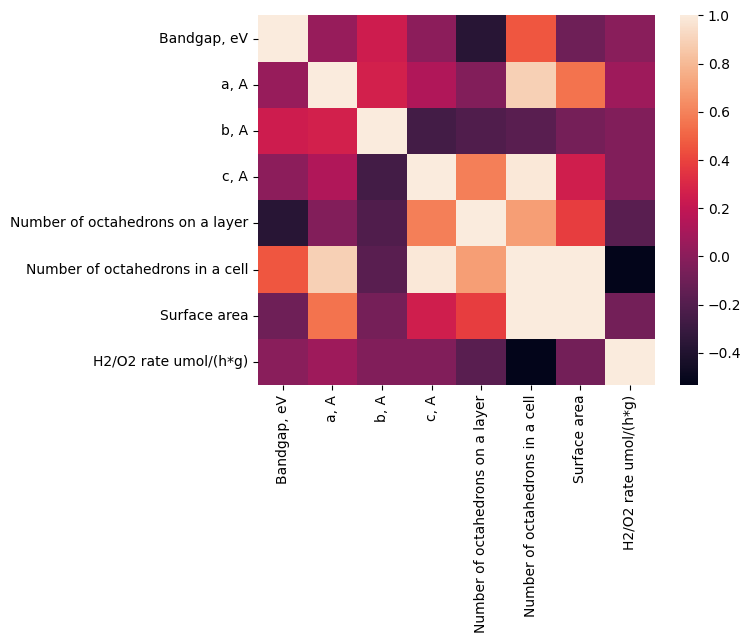

In [ ]:
sns.heatmap(df_inly_numeric )

In [ ]:
from mp_api.client import MPRester

API_KEY = "GFsoU5OV3dEngGT860TOtWcn35bE4y6l"  # Replace with your actual API key
with MPRester(API_KEY) as mpr:
    materials = mpr.materials.search(formula="KCa2Nb3O10")  # Extracting meterials ID from materials project

for material in materials:
    print(material.material_id, material.formula_pretty)

Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

mp-557195 KCa2Nb3O10
mp-1223594 KCa2Nb3O10


In [ ]:
API_KEY = "GFsoU5OV3dEngGT860TOtWcn35bE4y6l"
def get_material_id_by_formula(f):
  with MPRester(API_KEY) as mpr:
    print(f"Composition: {f}")
    try:
      materials = mpr.materials.search(formula=f)  # Extracting meterials ID from materials project
      if len(materials)>0:
        print(f"Composition: {f} ID is {materials[0].material_id}")
        return materials[0].material_id
      else:
        print(f"Composition: {f} ID is not found")
        return -1
    except Exception as e:
      print(f"Composition: {f} ID is not found")
      return -1



In [ ]:
df['Materials Project ID'] = df['Materials Project ID'].where(df['Materials Project ID'].notna(), df['Perovskite'].apply(get_material_id_by_formula))
#df['Materials Project ID'] = df['Perovskite'].apply(get_material_id_by_formula)

Composition: K4Nb6O17


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K4Nb6O17 ID is mp-560692
Composition: KLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: KLaNb2O7 ID is mp-1223501
Composition: RbLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaNb2O7 ID is mp-553965
Composition: CsLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsLaNb2O7 ID is mp-553248
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: RbCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbCa2Nb3O10 ID is mp-20396
Composition: CsCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsCa2Nb3O10 ID is mp-581330
Composition: KSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Nb3O10 ID is not found
Composition: KCa2NaNb4O13


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KCa2NaNb4O13 ID is not found
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: RbLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaTa2O7 ID is mp-541600
Composition: RbPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbPrTa2O7 ID is not found
Composition: RbNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbNdTa2O7 ID is not found
Composition: RbSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbSmTa2O7 ID is not found
Composition: CaTa2O6


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: CaTa2O6 ID is mp-554038
Composition: SrTa2O6


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrTa2O6 ID is mp-17715
Composition: BaTa2O6


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: BaTa2O6 ID is mp-676339
Composition: CaBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: CaBi2Ta2O9 ID is mp-556848
Composition: SrBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: SrBi2Ta2O9 ID is mp-554675
Composition: BaBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Ta2O9 ID is mp-23611
Composition: CaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CaBi2Nb2O9 ID is mp-555616
Composition: SrBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrBi2Nb2O9 ID is mp-23614
Composition: BaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Nb2O9 ID is mp-555867
Composition: PbBi2Nb1.8W0.2O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.8W0.2O9 ID is not found
Composition: PbBi2Nb1.85W0.15O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.85W0.15O9 ID is not found
Composition: PbBi2Nb1.9W0.1O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.9W0.1O9 ID is not found
Composition: PbBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: PbBi2Nb2O9 ID is mp-23101
Composition: PbBi2Nb1.9Ti0.1O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.9Ti0.1O9 ID is not found
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: RbLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaTa2O7 ID is mp-541600
Composition: RbPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbPrTa2O7 ID is not found
Composition: RbNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbNdTa2O7 ID is not found
Composition: RbSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbSmTa2O7 ID is not found
Composition: CaBi4Ti4O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CaBi4Ti4O15 ID is not found
Composition: PbBi4Ti4O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi4Ti4O15 ID is not found
Composition: CaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CaBi2Nb2O9 ID is mp-555616
Composition: PbBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: PbBi2Nb2O9 ID is mp-23101
Composition: K0.5La0.5Ca1.5Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K0.5La0.5Ca1.5Nb3O10 ID is not found
Composition: K0.5La0.5Ca0.75Pn0.75Nb3O10
Composition: K0.5La0.5Ca0.75Pn0.75Nb3O10 ID is not found
Composition: K0.5La0.25Bi0.25Ca0.75Pb0.75Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K0.5La0.25Bi0.25Ca0.75Pb0.75Nb3O10 ID is not found
Composition: Sr3Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Sr3Ti2O7 ID is mp-3349
Composition: PbTiO3


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: PbTiO3 ID is mp-19845
Composition: Sr5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Sr5Nb4O15 ID is mp-561133
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: CaLa4Ti4O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CaLa4Ti4O15 ID is not found
Composition: BaLa4Ti4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: BaLa4Ti4O15 ID is mp-1228245
Composition: La4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: La4Ti3O12 ID is mp-3249
Composition: CaLa4Ti4O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CaLa4Ti4O15 ID is not found
Composition: SrLa4Ti4O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: SrLa4Ti4O15 ID is not found
Composition: BaLa4Ti4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: BaLa4Ti4O15 ID is mp-1228245
Composition: Ba3LaNb3O12


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba3LaNb3O12 ID is mp-1228150
Composition: Sr5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Sr5Nb4O15 ID is mp-561133
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Sr3Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Sr3Ti2O7 ID is mp-3349
Composition: Sr4Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Sr4Ti3O10 ID is mp-31213
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: La4CaTi5O17


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La4CaTi5O17 ID is not found
Composition: BaLa4Ti4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: BaLa4Ti4O15 ID is mp-1228245
Composition: Ca2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Ca2Nb2O7 ID is mp-4155
Composition: Sr2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Nb2O7 ID is mp-15590
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: SrBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: SrBi2Ta2O9 ID is mp-554675
Composition: Sr2SnFeO6


Retrieving MaterialsDoc documents:   0%|          | 0/10 [00:00<?, ?it/s]

Composition: Sr2SnFeO6 ID is mp-1218821
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Sn0.45K0.2H0.9La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sn0.45K0.2H0.9La2Ti3O10 ID is not found
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Bi4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: Bi4Ti3O12 ID is mp-1179025
Composition: Bi4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: Bi4Ti3O12 ID is mp-1179025
Composition: Sr2Ta2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Ta2O7 ID is mp-13664
Composition: Sr2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Nb2O7 ID is mp-15590
Composition: NiO


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: NiO ID is mp-1180047
Composition: Rb4Ta6O17


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Rb4Ta6O17 ID is not found
Composition: Rb4Nb6O17


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Rb4Nb6O17 ID is not found
Composition: Sr2TiO4


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Sr2TiO4 ID is mp-5532
Composition: Sr1.9La0.1TiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr1.9La0.1TiO4 ID is not found
Composition: Sr1.8La0.2TiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr1.8La0.2TiO4 ID is not found
Composition: Sr1.7La0.3TiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr1.7La0.3TiO4 ID is not found
Composition: Sr1.6La0.4TiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr1.6La0.4TiO4 ID is not found
Composition: Sr1.5La0.5TiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr1.5La0.5TiO4 ID is not found
Composition: CsCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsCa2Ta3O10 ID is mp-10347
Composition: Cs0.03Na0.91Ca1.97Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Cs0.03Na0.91Ca1.97Ta3O10 ID is not found
Composition: Cs0.03Na0.1H0.87Ca2.11Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Cs0.03Na0.1H0.87Ca2.11Ta3O10 ID is not found
Composition: HCa2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Ta3O10 ID is not found
Composition: Bi5Ti3FeO15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Bi5Ti3FeO15 ID is mp-1217452
Composition: Bi4LaTi3FeO15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Bi4LaTi3FeO15 ID is not found
Composition: Bi3La2Ti3FeO15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Bi3La2Ti3FeO15 ID is not found
Composition: Bi2WO6


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: Bi2WO6 ID is mp-554500
Composition: KLaTiO4


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KLaTiO4 ID is mp-1104930
Composition: KLaZr0.1Ti0.9O4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KLaZr0.1Ti0.9O4 ID is not found
Composition: KLaZr0.3Ti0.7O4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KLaZr0.3Ti0.7O4 ID is not found
Composition: KLaZr0.5Ti0.5O4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KLaZr0.5Ti0.5O4 ID is not found
Composition: KLaZr0.7Ti0.3O4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KLaZr0.7Ti0.3O4 ID is not found
Composition: KLaZrO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KLaZrO4 ID is not found
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: K2La2Ti2.9Fe0.1O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.9Fe0.1O10 ID is not found
Composition: K2La2Ti2.8Fe0.2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.8Fe0.2O10 ID is not found
Composition: K2La2Ti2.7Fe0.3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.7Fe0.3O10 ID is not found
Composition: K2La2Ti2.6Fe0.4O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.6Fe0.4O10 ID is not found
Composition: K2La2Ti2.5Fe0.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.5Fe0.5O10 ID is not found
Composition: K2La2Ti2.8W0.2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.8W0.2O10 ID is not found
Composition: K2La2Ti2.8Ni0.2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2La2Ti2.8Ni0.2O10 ID is not found
Composition: H2SrTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: H2SrTa2O7 ID is mp-990430
Composition: Li2SrTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Li2SrTa2O7 ID is mp-6259
Composition: K2SrTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2SrTa2O7 ID is mp-7148
Composition: Rb2SrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Rb2SrTa2O7 ID is not found
Composition: KTaO3


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: KTaO3 ID is mp-3614
Composition: K6La2Ta6O21


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K6La2Ta6O21 ID is not found
Composition: H6La2Ta6O21


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H6La2Ta6O21 ID is not found
Composition: LaTa3O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: LaTa3O9 ID is mp-757365
Composition: H2SrTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: H2SrTa2O7 ID is mp-990430
Composition: K2Sr1.5Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2Sr1.5Ta3O10 ID is not found
Composition: Sr3Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Sr3Ti2O7 ID is mp-3349
Composition: Na2Ca2Nb4O13


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Na2Ca2Nb4O13 ID is not found
Composition: Sr2FeTaO6


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2FeTaO6 ID is mp-31760
Composition: Sr3FeTaO8


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr3FeTaO8 ID is not found
Composition: Sr4FeTaO9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr4FeTaO9 ID is not found
Composition: K2.33Sr0.67Nb5O14.335


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2.33Sr0.67Nb5O14.335 ID is not found
Composition: H2.33Sr0.67Nb5O14.335


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2.33Sr0.67Nb5O14.335 ID is not found
Composition: H2.33Sr0.67Nb5O14.335


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2.33Sr0.67Nb5O14.335 ID is not found
Composition: Bi2W2O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Bi2W2O9 ID is mp-1197485
Composition: Bi2WO6


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: Bi2WO6 ID is mp-554500
Composition: Bi14W2O27


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Bi14W2O27 ID is not found
Composition: Bi2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Bi2Ti2O7 ID is mp-559482
Composition: Bi4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: Bi4Ti3O12 ID is mp-1179025
Composition: Bi3TiNbO9


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Bi3TiNbO9 ID is mp-1216974
Composition: Bi2MoO6


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: Bi2MoO6 ID is mp-23423
Composition: BaBi4Ti4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi4Ti4O15 ID is mp-1227554
Composition: Bi2MoO6


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: Bi2MoO6 ID is mp-23423
Composition: PbBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: PbBi2Nb2O9 ID is mp-23101
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: CaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CaBi2Nb2O9 ID is mp-555616
Composition: SrBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrBi2Nb2O9 ID is mp-23614
Composition: BaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Nb2O9 ID is mp-555867
Composition: CaBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: CaBi2Ta2O9 ID is mp-556848
Composition: SrBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: SrBi2Ta2O9 ID is mp-554675
Composition: BaBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Ta2O9 ID is mp-23611
Composition: K0.5La0.5Bi2Ta2O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K0.5La0.5Bi2Ta2O9 ID is not found
Composition: K0.5La0.5Bi2Nb2O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K0.5La0.5Bi2Nb2O9 ID is not found
Composition: H1.9K0.3La0.5Bi0.1Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.9K0.3La0.5Bi0.1Ta2O7 ID is not found
Composition: H1.6K0.2La0.3Bi0.1Nb2O6.5


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.6K0.2La0.3Bi0.1Nb2O6.5 ID is not found
Composition: K2LaTa5O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2LaTa5O15 ID is mp-1204933
Composition: H1.8Ca0.8Bi0.2Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.8Ca0.8Bi0.2Ta2O7 ID is not found
Composition: H1.8Sr0.8Bi0.2Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.8Sr0.8Bi0.2Ta2O7 ID is not found
Composition: H1.9Ba0.8Bi0.1Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.9Ba0.8Bi0.1Ta2O7 ID is not found
Composition: H1.9K0.3La0.5Bi0.1Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.9K0.3La0.5Bi0.1Ta2O7 ID is not found
Composition: Bi4Nb8OCl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Bi4Nb8OCl ID is not found
Composition: BiOCl


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BiOCl ID is mp-22939
Composition: Bi4NbO8Cl


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Bi4NbO8Cl ID is mp-23630
Composition: Bi4NbO8Br


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Bi4NbO8Br ID is mp-1198841
Composition: Bi4TaO8Cl


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Bi4TaO8Cl ID is mp-558314
Composition: Bi4TaO8Br


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Bi4TaO8Br ID is mp-554207
Composition: HLaTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTa2O7 ID is not found
Composition: NaLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: NaLaTa2O7 ID is mp-1220741
Composition: RbLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaTa2O7 ID is mp-541600
Composition: CsLaTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsLaTa2O7 ID is not found
Composition: HPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HPrTa2O7 ID is not found
Composition: NaPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NaPrTa2O7 ID is not found
Composition: RbPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbPrTa2O7 ID is not found
Composition: CsPrTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsPrTa2O7 ID is not found
Composition: HNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTa2O7 ID is not found
Composition: NaNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NaNdTa2O7 ID is not found
Composition: RbNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbNdTa2O7 ID is not found
Composition: CsNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsNdTa2O7 ID is not found
Composition: HSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSmTa2O7 ID is not found
Composition: NaSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NaSmTa2O7 ID is not found
Composition: RbSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbSmTa2O7 ID is not found
Composition: CsSmTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsSmTa2O7 ID is not found
Composition: LiCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: LiCa2Ta3O10 ID is mp-774479
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O10 ID is not found
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: KSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Nb3O10 ID is not found
Composition: KSr2TaNb2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2TaNb2O10 ID is not found
Composition: KSr2Ta1.5Nb1.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Ta1.5Nb1.5O10 ID is not found
Composition: KSr2Ta2NbO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Ta2NbO10 ID is not found
Composition: KSr2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Ta3O10 ID is not found
Composition: HSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O10 ID is not found
Composition: HSr2TaNb2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2TaNb2O10 ID is not found
Composition: HSr2Ta1.5Nb1.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta1.5Nb1.5O10 ID is not found
Composition: HSr2Ta2NbO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta2NbO10 ID is not found
Composition: HSr2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta3O10 ID is not found
Composition: HSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O10 ID is not found
Composition: HSr2TaNb2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2TaNb2O10 ID is not found
Composition: HSr2Ta1.5Nb1.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta1.5Nb1.5O10 ID is not found
Composition: HSr2Ta2NbO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta2NbO10 ID is not found
Composition: HSr2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Ta3O10 ID is not found
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: NaLaSrNb2NiO9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NaLaSrNb2NiO9 ID is not found
Composition: CsLaSrNb2NiO9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsLaSrNb2NiO9 ID is not found
Composition: HLaSrNb2NiO9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaSrNb2NiO9 ID is not found
Composition: H2Ca4Nb6O20


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Ca4Nb6O20 ID is not found
Composition: H2Ca4Ta2Nb4O20


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Ca4Ta2Nb4O20 ID is not found
Composition: H2Ca4Ta3Nb3O20


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Ca4Ta3Nb3O20 ID is not found
Composition: H2Ca4Ta4Nb2O20


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Ca4Ta4Nb2O20 ID is not found
Composition: H2Ca4Ta6O20


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Ca4Ta6O20 ID is not found
Composition: RbLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaNb2O7 ID is mp-553965
Composition: AgLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: AgLaNb2O7 ID is mp-1222828
Composition: RbLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaNb2O7 ID is mp-553965
Composition: AgLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: AgLaNb2O7 ID is mp-1222828
Composition: RbCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbCa2Nb3O10 ID is mp-20396
Composition: AgCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: AgCa2Nb3O10 ID is not found
Composition: RbSr2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbSr2Nb3O10 ID is mp-22720
Composition: AgSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: AgSr2Nb3O10 ID is not found
Composition: Rb2La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Rb2La2Ti3O10 ID is not found
Composition: Ag2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ag2La2Ti3O10 ID is mp-6000
Composition: AgLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: AgLaNb2O7 ID is mp-1222828
Composition: AgCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: AgCa2Nb3O10 ID is not found
Composition: AgSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: AgSr2Nb3O10 ID is not found
Composition: Ag2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ag2La2Ti3O10 ID is mp-6000
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: Ca2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Ca2Nb2O7 ID is mp-4155
Composition: Sr2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Nb2O7 ID is mp-15590
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: La4CaTi5O17


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La4CaTi5O17 ID is not found
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: K4Nb6O17


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K4Nb6O17 ID is mp-560692
Composition: KBa2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KBa2Ta3O10 ID is not found
Composition: Sr2Ta2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Ta2O7 ID is mp-13664
Composition: Sr2Nb0.05Ta0.95O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.05Ta0.95O7 ID is not found
Composition: Sr2Nb0.1Ta0.9O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.1Ta0.9O7 ID is not found
Composition: Sr2Nb0.15Ta0.85O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.15Ta0.85O7 ID is not found
Composition: Sr2Nb0.25Ta0.75O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.25Ta0.75O7 ID is not found
Composition: Sr2Nb0.35Ta0.65O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.35Ta0.65O7 ID is not found
Composition: Sr2Nb0.5Ta0.5O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.5Ta0.5O7 ID is not found
Composition: Sr2Nb0.8Ta0.2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Nb0.8Ta0.2O7 ID is not found
Composition: Sr2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Nb2O7 ID is mp-15590
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: NdLaTi2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NdLaTi2O7 ID is not found
Composition: Nd2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Nd2Ti2O7 ID is mp-555785
Composition: Pr2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Pr2Ti2O7 ID is mp-15201
Composition: PrLaTi2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PrLaTi2O7 ID is not found
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Cu(I)-K2La2Ti3O10
Composition: Cu(I)-K2La2Ti3O10 ID is not found
Composition: Cu(I)-K4Nb6O17
Composition: Cu(I)-K4Nb6O17 ID is not found
Composition: K4Nb6O17


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K4Nb6O17 ID is mp-560692
Composition: Cu(I)-KLaNb2O7
Composition: Cu(I)-KLaNb2O7 ID is not found
Composition: KLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: KLaNb2O7 ID is mp-1223501
Composition: Cu(I)-RbCa2Ta3O10
Composition: Cu(I)-RbCa2Ta3O10 ID is not found
Composition: RbCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbCa2Ta3O10 ID is mp-6680
Composition: LiTaO3


Retrieving MaterialsDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Composition: LiTaO3 ID is mp-754345
Composition: NaTaO3


Retrieving MaterialsDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Composition: NaTaO3 ID is mp-676280
Composition: Cu(I)-LiTaO3
Composition: Cu(I)-LiTaO3 ID is not found
Composition: Cu(I)-NaTaO3
Composition: Cu(I)-NaTaO3 ID is not found
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: H0.98LaNb1.98Mo0.02O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.98LaNb1.98Mo0.02O7 ID is not found
Composition: H0.95LaNb1.95Mo0.05O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.95LaNb1.95Mo0.05O7 ID is not found
Composition: H0.85LaNb1.85Mo0.15O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.85LaNb1.85Mo0.15O7 ID is not found
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: H0.98LaNb1.98Mo0.02O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.98LaNb1.98Mo0.02O7 ID is not found
Composition: H0.95LaNb1.95Mo0.05O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.95LaNb1.95Mo0.05O7 ID is not found
Composition: H0.85LaNb1.85Mo0.15O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H0.85LaNb1.85Mo0.15O7 ID is not found
Composition: PbBi2Nb1.8W0.2O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.8W0.2O9 ID is not found
Composition: PbBi2Nb1.85W0.15O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.85W0.15O9 ID is not found
Composition: PbBi2Nb1.9W0.1O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.9W0.1O9 ID is not found
Composition: PbBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: PbBi2Nb2O9 ID is mp-23101
Composition: PbBi2Nb1.9Ti0.1O9


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi2Nb1.9Ti0.1O9 ID is not found
Composition: Bi4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: Bi4Ti3O12 ID is mp-1179025
Composition: CsCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsCa2Ta3O10 ID is mp-10347
Composition: CsCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsCa2Ta3O10 ID is mp-10347
Composition: HPb2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HPb2Nb3O10 ID is not found
Composition: H1.8Pb2Nb2.6Cr0.4O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.8Pb2Nb2.6Cr0.4O10 ID is not found
Composition: Ba5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Ta4O15 ID is mp-504554
Composition: Ba5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Ta4O15 ID is mp-504554
Composition: Sr5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr5Ta4O15 ID is mp-769297
Composition: Sr5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr5Ta4O15 ID is mp-769297
Composition: Sr2Ta2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Ta2O7 ID is mp-13664
Composition: Sr2Ta2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Ta2O7 ID is mp-13664
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: Fe0.02La1.98Ti2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Fe0.02La1.98Ti2O7 ID is not found
Composition: Cr0.02La1.98Ti2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Cr0.02La1.98Ti2O7 ID is not found
Composition: Sr2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr2Nb2O7 ID is mp-15590
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: TiO2


Retrieving MaterialsDoc documents:   0%|          | 0/46 [00:00<?, ?it/s]

Composition: TiO2 ID is mp-1245098
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HLaNb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: HLaNb2O7 ID is mp-1205881
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2TaNb2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2TaNb2O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2TaNb2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2TaNb2O10 ID is not found
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: CaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CaBi2Nb2O9 ID is mp-555616
Composition: SrBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrBi2Nb2O9 ID is mp-23614
Composition: BaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Nb2O9 ID is mp-555867
Composition: CaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CaBi2Nb2O9 ID is mp-555616
Composition: SrBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrBi2Nb2O9 ID is mp-23614
Composition: BaBi2Nb2O9


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: BaBi2Nb2O9 ID is mp-555867
Composition: Na2Ta2O6


Retrieving MaterialsDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Composition: Na2Ta2O6 ID is mp-676280
Composition: K2Ta2O6


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2Ta2O6 ID is mp-3614
Composition: Ca2Ta2O7


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Ca2Ta2O7 ID is mp-640836
Composition: Ca2Nb2O7


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: Ca2Nb2O7 ID is mp-4155
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: Ba5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Ta4O15 ID is mp-504554
Composition: Ba5Ta2Nb2O15


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Ba5Ta2Nb2O15 ID is not found
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: ZnO


Retrieving MaterialsDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Composition: ZnO ID is mp-1245015
Composition: ZnO


Retrieving MaterialsDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Composition: ZnO ID is mp-1245015
Composition: ZnO


Retrieving MaterialsDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Composition: ZnO ID is mp-1245015
Composition: CdS


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: CdS ID is mp-1021511
Composition: Zn0.1Cd0.9S


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Zn0.1Cd0.9S ID is not found
Composition: Zn0.3Cd0.7S


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Zn0.3Cd0.7S ID is not found
Composition: Zn0.5Cd0.5S


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Zn0.5Cd0.5S ID is not found
Composition: Zn0.7Cd0.2S


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Zn0.7Cd0.2S ID is not found
Composition: Zn0.9Cd0.1S


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Zn0.9Cd0.1S ID is not found
Composition: ZnS


Retrieving MaterialsDoc documents:   0%|          | 0/145 [00:00<?, ?it/s]

Composition: ZnS ID is mp-1244890
Composition: SrTa2O6


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: SrTa2O6 ID is mp-17715
Composition: Sr4Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Composition: Sr4Ta2O9 ID is mp-769246
Composition: Sr5Ta4O15


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: Sr5Ta4O15 ID is mp-769297
Composition: CuBi2O4 


Retrieving MaterialsDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Composition: CuBi2O4  ID is mp-560165
Composition: K4Nb6O17


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K4Nb6O17 ID is mp-560692
Composition: CsCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsCa2Ta3O10 ID is mp-10347
Composition: CsCa2Ta3O9.7N0.2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsCa2Ta3O9.7N0.2 ID is not found
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: Ba5Nb4O15


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Ba5Nb4O15 ID is mp-3563
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: CsSr1.5Ba0.5Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsSr1.5Ba0.5Ta3O10 ID is not found
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: CsBa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: CsBa2Nb3O10 ID is mp-505814
Composition: HBa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HBa2Nb3O10 ID is not found
Composition: HSr2Nb3O19*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*yH2O ID is not found
Composition: HSr2Nb3O19*MeNH2*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*MeNH2*yH2O ID is not found
Composition: HSr2Nb3O19*EtNH2*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*EtNH2*yH2O ID is not found
Composition: HSr2Nb3O19*PrNH2*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*PrNH2*yH2O ID is not found
Composition: HSr2Nb3O19*BuNH2*yH2O
Composition: HSr2Nb3O19*BuNH2*yH2O ID is not found
Composition: HSr2Nb3O19*HxNH2*yH2O
Composition: HSr2Nb3O19*HxNH2*yH2O ID is not found
Composition: HSr2Nb3O19*OcNH2*yH2O
Composition: HSr2Nb3O19*OcNH2*yH2O ID is not found
Composition: HSr2Nb3O19*MeOH*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*MeOH*yH2O ID is not found
Composition: HSr2Nb3O19*EtOH*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*EtOH*yH2O ID is not found
Composition: HSr2Nb3O19*PrOH*yH2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O19*PrOH*yH2O ID is not found
Composition: HSr2Nb3O19*BuOH*yH2O
Composition: HSr2Nb3O19*BuOH*yH2O ID is not found
Composition: HSr2Nb3O19*HxOH*yH2O
Composition: HSr2Nb3O19*HxOH*yH2O ID is not found
Composition: HSr2Nb3O19*OcNH2*yH2O
Composition: HSr2Nb3O19*OcNH2*yH2O ID is not found
Composition: Li2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Li2La2Ti3O10 ID is mp-9406
Composition: Na2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Na2La2Ti3O10 ID is mp-6144
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Li2Nd2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Li2Nd2Ti3O10 ID is not found
Composition: Na2Nd2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: Na2Nd2Ti3O10 ID is mp-6119
Composition: K2Nd2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2Nd2Ti3O10 ID is mp-1223975
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KCa2Nb3O10-Yellow
Composition: KCa2Nb3O10-Yellow ID is not found
Composition: KCa2Nb3O10-Black
Composition: KCa2Nb3O10-Black ID is not found
Composition: RbLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaTa2O7 ID is mp-541600
Composition: RbLaTa2O7


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: RbLaTa2O7 ID is mp-541600
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KNaCa2Nb4O13


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KNaCa2Nb4O13 ID is not found
Composition: KNa2Ca2Nb5O16


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KNa2Ca2Nb5O16 ID is not found
Composition: KNa3Ca2Nb6O19


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KNa3Ca2Nb6O19 ID is not found
Composition: Ca2Nb2TaO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Ca2Nb2TaO10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa1.5Sr0.5Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa1.5Sr0.5Nb3O10 ID is not found
Composition: HCaSrNb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCaSrNb3O10 ID is not found
Composition: HCa0.5Sr1.5Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa0.5Sr1.5Nb3O10 ID is not found
Composition: HSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O10 ID is not found
Composition: HCa2Nb2.7Ta0.3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb2.7Ta0.3O10 ID is not found
Composition: HCa2Nb2TaO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb2TaO10 ID is not found
Composition: HCa2Nb1.5Ta1.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb1.5Ta1.5O10 ID is not found
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KCaSrNb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KCaSrNb3O10 ID is not found
Composition: KSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KSr2Nb3O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: H4Nb6O17


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H4Nb6O17 ID is not found
Composition: HCa2Nb2.7Ta0.3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb2.7Ta0.3O10 ID is not found
Composition: HCa2Nb1.5Ta1.5O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb1.5Ta1.5O10 ID is not found
Composition: La2Ti2O7


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: La2Ti2O7 ID is mp-4423
Composition: La2Ti3O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La2Ti3O7 ID is not found
Composition: KCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: KCa2Ta3O10 ID is mp-1223520
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: CsBa2Ta3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsBa2Ta3O10 ID is not found
Composition: K2La2Ti3O10 


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10  ID is mp-6548
Composition: K2La2Ti3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: K2La2Ti3O10 ID is mp-6548
Composition: Bi2WO6


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: Bi2WO6 ID is mp-554500
Composition: Cs0.67Ti1.83O4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Cs0.67Ti1.83O4 ID is not found
Composition: HLaTiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4 ID is not found
Composition: HLaTiO4*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*MeNH2 ID is not found
Composition: HLaTiO4*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*EtNH2 ID is not found
Composition: HLaTiO4*PrNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*PrNH2 ID is not found
Composition: HLaTiO4*BuNH2
Composition: HLaTiO4*BuNH2 ID is not found
Composition: HLaTiO4*HxNH2
Composition: HLaTiO4*HxNH2 ID is not found
Composition: HLaTiO4*OxNH2
Composition: HLaTiO4*OxNH2 ID is not found
Composition: HLaTiO4*MeOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*MeOH ID is not found
Composition: HLaTiO4*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*EtOH ID is not found
Composition: HLaTiO4*PrOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLaTiO4*PrOH ID is not found
Composition: HLaTiO4*BuOH
Composition: HLaTiO4*BuOH ID is not found
Composition: HLaTiO4*HxOH
Composition: HLaTiO4*HxOH ID is not found
Composition: HLaTiO4*OxOH
Composition: HLaTiO4*OxOH ID is not found
Composition: HNdTiO4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4 ID is not found
Composition: HNdTiO4*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*MeNH2 ID is not found
Composition: HNdTiO4*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*EtNH2 ID is not found
Composition: HNdTiO4*PrNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*PrNH2 ID is not found
Composition: HNdTiO4*BuNH2
Composition: HNdTiO4*BuNH2 ID is not found
Composition: HNdTiO4*HxNH2
Composition: HNdTiO4*HxNH2 ID is not found
Composition: HNdTiO4*OxNH2
Composition: HNdTiO4*OxNH2 ID is not found
Composition: HNdTiO4*MeOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*MeOH ID is not found
Composition: HNdTiO4*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*EtOH ID is not found
Composition: HNdTiO4*PrOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTiO4*PrOH ID is not found
Composition: HNdTiO4*BuOH
Composition: HNdTiO4*BuOH ID is not found
Composition: HNdTiO4*HxOH
Composition: HNdTiO4*HxOH ID is not found
Composition: HNdTiO4*OxOH
Composition: HNdTiO4*OxOH ID is not found
Composition: HSr2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HSr2Nb3O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10*MeOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*MeOH ID is not found
Composition: HCa2Nb3O10*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*EtOH ID is not found
Composition: HCa2Nb3O10*PrOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*PrOH ID is not found
Composition: HCa2Nb3O10*BuOH
Composition: HCa2Nb3O10*BuOH ID is not found
Composition: HCa2Nb3O10*HxOH
Composition: HCa2Nb3O10*HxOH ID is not found
Composition: HCa2Nb3O10*OxOH
Composition: HCa2Nb3O10*OxOH ID is not found
Composition: Rb2La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Rb2La2Ti3O10 ID is not found
Composition: HRbLa2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HRbLa2Ti3O10 ID is not found
Composition: H1.5Rb0.5La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H1.5Rb0.5La2Ti3O10 ID is not found
Composition: H2La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10 ID is not found
Composition: HNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HNdTa2O7 ID is not found
Composition: LiNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: LiNdTa2O7 ID is not found
Composition: NaNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: NaNdTa2O7 ID is not found
Composition: KNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KNdTa2O7 ID is not found
Composition: RbNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbNdTa2O7 ID is not found
Composition: CsNdTa2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: CsNdTa2O7 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10*BuNH2
Composition: HCa2Nb3O10*BuNH2 ID is not found
Composition: HCa2Nb3O10*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*EtOH ID is not found
Composition: HLa2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLa2Ti3O10 ID is not found
Composition: HLa2Ti3O10*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLa2Ti3O10*EtNH2 ID is not found
Composition: HLa2Ti3O10*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HLa2Ti3O10*EtOH ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*MeNH2 ID is not found
Composition: HCa2Nb3O10*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*EtNH2 ID is not found
Composition: HCa2Nb3O10*PrNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*PrNH2 ID is not found
Composition: HCa2Nb3O10*BuNH2
Composition: HCa2Nb3O10*BuNH2 ID is not found
Composition: HCa2Nb3O10*HxNH2
Composition: HCa2Nb3O10*HxNH2 ID is not found
Composition: HCa2Nb3O10*OcNH2
Composition: HCa2Nb3O10*OcNH2 ID is not found
Composition: H2La2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10 ID is not found
Composition: H2La2Ti3O10*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*MeNH2 ID is not found
Composition: H2La2Ti3O10*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*EtNH2 ID is not found
Composition: H2La2Ti3O10*PrNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*PrNH2 ID is not found
Composition: H2La2Ti3O10*BuNH2
Composition: H2La2Ti3O10*BuNH2 ID is not found
Composition: H2La2Ti3O10*HxNH2
Composition: H2La2Ti3O10*HxNH2 ID is not found
Composition: H2La2Ti3O10*OcNH2
Composition: H2La2Ti3O10*OcNH2 ID is not found
Composition: H2La2Ti3O10*MeOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*MeOH ID is not found
Composition: H2La2Ti3O10*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*EtOH ID is not found
Composition: H2La2Ti3O10*PrOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2La2Ti3O10*PrOH ID is not found
Composition: H2La2Ti3O10*BuOH
Composition: H2La2Ti3O10*BuOH ID is not found
Composition: H2La2Ti3O10*HxOH
Composition: H2La2Ti3O10*HxOH ID is not found
Composition: H2La2Ti3O10*DcOH
Composition: H2La2Ti3O10*DcOH ID is not found
Composition: H2Nd2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10 ID is not found
Composition: H2Nd2Ti3O10*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*MeNH2 ID is not found
Composition: H2Nd2Ti3O10*EtNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*EtNH2 ID is not found
Composition: H2Nd2Ti3O10*PrNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*PrNH2 ID is not found
Composition: H2Nd2Ti3O10*BuNH2
Composition: H2Nd2Ti3O10*BuNH2 ID is not found
Composition: H2Nd2Ti3O10*HxNH2
Composition: H2Nd2Ti3O10*HxNH2 ID is not found
Composition: H2Nd2Ti3O10*OcNH2
Composition: H2Nd2Ti3O10*OcNH2 ID is not found
Composition: H2Nd2Ti3O10*MeOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*MeOH ID is not found
Composition: H2Nd2Ti3O10*EtOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*EtOH ID is not found
Composition: H2Nd2Ti3O10*PrOH


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10*PrOH ID is not found
Composition: H2Nd2Ti3O10*BuOH
Composition: H2Nd2Ti3O10*BuOH ID is not found
Composition: H2Nd2Ti3O10*HxOH
Composition: H2Nd2Ti3O10*HxOH ID is not found
Composition: H2Nd2Ti3O10*DcOH
Composition: H2Nd2Ti3O10*DcOH ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2K0.5Bi2.5Ti4O13*H2O ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2K0.5Bi2.5Ti4O13*H2O*MeNH2 ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*EtNH3


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2K0.5Bi2.5Ti4O13*H2O*EtNH3 ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*PrNH4


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2K0.5Bi2.5Ti4O13*H2O*PrNH4 ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*BuNH5
Composition: H2K0.5Bi2.5Ti4O13*H2O*BuNH5 ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*HxNH6
Composition: H2K0.5Bi2.5Ti4O13*H2O*HxNH6 ID is not found
Composition: H2K0.5Bi2.5Ti4O13*H2O*OcNH7
Composition: H2K0.5Bi2.5Ti4O13*H2O*OcNH7 ID is not found
Composition: H2Nd2Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Nd2Ti3O10 ID is not found
Composition: H2Nd2Ti3O10*BuNH2
Composition: H2Nd2Ti3O10*BuNH2 ID is not found
Composition: SrBi2Ta2O9


Retrieving MaterialsDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Composition: SrBi2Ta2O9 ID is mp-554675
Composition: K2Gd1.4Eu0.6Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: K2Gd1.4Eu0.6Ti3O10 ID is not found
Composition: H2Gd1.4Eu0.6Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: H2Gd1.4Eu0.6Ti3O10 ID is not found
Composition: RbLa0.7Tb0.3Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: RbLa0.7Tb0.3Ta2O7 ID is not found
Composition: Gd1.4Eu0.6Ti3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Gd1.4Eu0.6Ti3O10 ID is not found
Composition: La0.7Tb0.3Ta2O7


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La0.7Tb0.3Ta2O7 ID is not found
Composition: La3Ni2O6.92


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La3Ni2O6.92 ID is not found
Composition: La3Ni2O6.35


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: La3Ni2O6.35 ID is not found
Composition: La1/3NbO3
Composition: La1/3NbO3 ID is not found
Composition: La1/3TaO3
Composition: La1/3TaO3 ID is not found
Composition: CaTiO3 


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: CaTiO3  ID is mp-3442
Composition: Sr2Bi3Ta2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Bi3Ta2O11Cl ID is not found
Composition: SrPbBi3Ta2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: SrPbBi3Ta2O11Cl ID is not found
Composition: Ba2Bi3Ta2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Ba2Bi3Ta2O11Cl ID is not found
Composition: BaPbBi3Ta2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: BaPbBi3Ta2O11Cl ID is not found
Composition: SrBi4TiTaO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: SrBi4TiTaO11Cl ID is not found
Composition: BaBi4TiTaO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: BaBi4TiTaO11Cl ID is not found
Composition: PbBi4TiTaO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi4TiTaO11Cl ID is not found
Composition: Sr2Bi3Nb2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Sr2Bi3Nb2O11Cl ID is not found
Composition: SrPbBi3Nb2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: SrPbBi3Nb2O11Cl ID is not found
Composition: Ba2Bi3Nb2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: Ba2Bi3Nb2O11Cl ID is not found
Composition: BaPbBi3Nb2O11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: BaPbBi3Nb2O11Cl ID is not found
Composition: SrBi4TiNbO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: SrBi4TiNbO11Cl ID is not found
Composition: BaBi4TiNbO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: BaBi4TiNbO11Cl ID is not found
Composition: PbBi4TiNbO11Cl


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: PbBi4TiNbO11Cl ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10 ID is not found
Composition: HCa2Nb3O10*MeNH2


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: HCa2Nb3O10*MeNH2 ID is not found
Composition: HCa2Nb3O10*BuNH2
Composition: HCa2Nb3O10*BuNH2 ID is not found
Composition: HCa2Nb3O10*OcNH2
Composition: HCa2Nb3O10*OcNH2 ID is not found
Composition: HCa2Nb3O10*MeNH2/Pt
Composition: HCa2Nb3O10*MeNH2/Pt ID is not found
Composition: HCa2Nb3O10*BuNH2/Pt
Composition: HCa2Nb3O10*BuNH2/Pt ID is not found
Composition: HCa2Nb3O10*OcNH2/Pt
Composition: HCa2Nb3O10*OcNH2/Pt ID is not found
Composition: HCa2Nb3O10/Pt*MeNH2
Composition: HCa2Nb3O10/Pt*MeNH2 ID is not found
Composition: HCa2Nb3O10/Pt*BuNH2
Composition: HCa2Nb3O10/Pt*BuNH2 ID is not found
Composition: Bi4Ti3O12


Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Composition: Bi4Ti3O12 ID is mp-1179025
Composition: KCa2Nb3O10


Retrieving MaterialsDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Composition: KCa2Nb3O10 ID is mp-557195
Composition: KCa2Nb2TaO10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KCa2Nb2TaO10 ID is not found
Composition: KCa2NbTa2O10


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Composition: KCa2NbTa2O10 ID is not found
Composition: KCa2Ta3O10


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Composition: KCa2Ta3O10 ID is mp-1223520


In [ ]:
df


Perovskite          Hill formula Interlayer space composition Dopant  \
0        K4Nb6O17            K4 Nb6 O17                          NaN    NaN   
1        KLaNb2O7           K La Nb2 O7                          NaN    NaN   
2       RbLaNb2O7          La Nb2 O7 Rb                          NaN    NaN   
3       CsLaNb2O7          Cs La Nb2 O7                          NaN    NaN   
4      KCa2Nb3O10         Ca2 K Nb3 O10                          NaN    NaN   
..            ...                   ...                          ...    ...   
519     Bi4Ti3O12  C8 Ca2 H20 N Nb3 O10                          NaN     Pt   
520    KCa2Nb3O10                   NaN                          NaN    NaN   
521  KCa2Nb2TaO10                   NaN                          NaN    NaN   
522  KCa2NbTa2O10                   NaN                          NaN    NaN   
523    KCa2Ta3O10                   NaN                          NaN    NaN   

     Dopant, wt%  Bandgap, eV                 DOI Materials Project ID  \
0            NaN         3.50  10.1007/BF00765319            mp-560692   
1            NaN         3.20  10.1007/BF00765319           mp-1223501   
2            NaN         3.35  10.1007/BF00765319            mp-553965   
3            NaN         3.30  10.1007/BF00765319            mp-553248   
4            NaN         3.35  10.1007/BF00765319            mp-557195   
..           ...          ...                 ...                  ...   
519          1.0         3.61                   *                   -1   
520          NaN         3.50                 NaN            mp-557195   
521          NaN         3.60                 NaN                   -1   
522          NaN         3.80                 NaN                   -1   
523          NaN         4.20                 NaN           mp-1223520   

      COD_ID Springer_ID  ...  frac s valence electrons  \
0    1001842         NaN  ...                  0.323529   
1    1545643         NaN  ...                  0.339286   
2         -1         NaN  ...                  0.339286   
3    2004917         NaN  ...                  0.339286   
4    1521061         NaN  ...                  0.350000   
..       ...         ...  ...                       ...   
519       -1         NaN  ...                  0.477941   
520      NaN         NaN  ...                       NaN   
521      NaN         NaN  ...                       NaN   
522      NaN         NaN  ...                       NaN   
523      NaN         NaN  ...                       NaN   

     frac p valence electrons frac d valence electrons  \
0                    0.500000                 0.176471   
1                    0.500000                 0.160714   
2                    0.500000                 0.160714   
3                    0.500000                 0.160714   
4                    0.500000                 0.150000   
..                        ...                      ...   
519                  0.433824                 0.088235   
520                       NaN                      NaN   
521                       NaN                      NaN   
522                       NaN                      NaN   
523                       NaN                      NaN   

    frac f valence electrons MagpieData minimum Electronegativity  \
0                        0.0                                 0.82   
1                        0.0                                 0.82   
2                        0.0                                 0.82   
3                        0.0                                 0.79   
4                        0.0                                 0.82   
..                       ...                                  ...   
519                      0.0                                 1.00   
520                      NaN                                  NaN   
521                      NaN                                  NaN   
522                      NaN                                  NaN   
523 

In [ ]:
df.to_excel('dataset_with_MP_IDs.xlsx')

In [ ]:
df.columns

Index(['Perovskite', 'Hill formula', 'Interlayer space composition', 'Dopant',
       'Dopant, wt%', 'Bandgap, eV', 'DOI', 'Materials Project ID', 'COD_ID',
       'Springer_ID', 'Z', 'Z_MP', 'a, A', 'b, A', 'c, A', 'Symmetry group',
       'd,A', 'a_MP', 'b_MP', 'c_MP', 'XRD pattern', 'Crystal structure',
       'Number of octahedrons on a layer', 'Valence electrons', 'Volume',
       'Valence Electrons Density', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
       'MagpieData mean Electronegativity',
       'Average Pauling electronegativity',
       'Average Mulliken electronegativity'],
      dtype='object')

In [ ]:
counts = df['Materials Project ID'].value_counts()
print(counts)

Materials Project ID
-1            296
mp-1205881     18
mp-557195      14
mp-4423        13
mp-23101       12
             ... 
mp-505814       1
mp-6144         1
mp-6119         1
mp-1223975      1
mp-3442         1
Name: count, Length: 88, dtype: int64


In [ ]:
def extract_CIF_from_MP(material_id):
  if(material_id==-1):
    return
  with MPRester(API_KEY) as mpr:
    #data = mpr.materials.search(material_ids=material_id)
    structure = mpr.materials.get_structure_by_material_id(material_id )
    cif_string = structure.to("struct.cif")

  ##with open(f"{material_id}.cif", "w") as f:
  #    f.write(cif_string)
  with open(f'/content/drive/MyDrive/University/Artificial intelligence in chemistry/Perovskite project/Perovskite-liked-oxides-bandgap-prediction/Data/CIF/{material_id}.cif', 'w') as f:
      f.write(cif_string)


In [29]:
#extract_CIF_from_MP("mp-6144")
#df['Materials Project ID'].apply(extract_CIF_from_MP)
df.to_excel('version.xlsx')

In [ ]:
df['Materials Project ID'].value_counts()

Materials Project ID
-1            296
mp-1205881     18
mp-557195      14
mp-4423        13
mp-23101       12
             ... 
mp-505814       1
mp-6144         1
mp-6119         1
mp-1223975      1
mp-3442         1
Name: count, Length: 88, dtype: int64

In [ ]:

# Example query for compounds with the formula "KCa2NaNb4O13" in JSON format
url = "https://www.crystallography.net/cod/result"
params = {
    'formula': 'O2 Ti',
    'format': 'json'
}
url="https://www.crystallography.net/cod/result?formula=Ca2 K Nb3 O10&format=json"
url="https://www.crystallography.net/cod/result?formula=O2 Ti&format=json"
#response = requests.get(url, params=params)
response = requests.get(url)

if response.status_code == 200:
    print(response.json())
else:
    print(f"Failed to retrieve data: {response.status_code}")

[{'file': '1010942', 'a': '3.73', 'siga': None, 'b': '3.73', 'sigb': None, 'c': '9.37', 'sigc': None, 'alpha': '90', 'sigalpha': None, 'beta': '90', 'sigbeta': None, 'gamma': '90', 'siggamma': None, 'vol': '130.4', 'sigvol': None, 'celltemp': None, 'sigcelltemp': None, 'diffrtemp': None, 'sigdiffrtemp': None, 'cellpressure': None, 'sigcellpressure': None, 'diffrpressure': None, 'sigdiffrpressure': None, 'thermalhist': None, 'pressurehist': None, 'compoundsource': None, 'nel': '2', 'sg': 'I 41/a m d :1', 'sgHall': 'I 4bw 2bw -1bw', 'sgNumber': '141', 'commonname': None, 'chemname': 'Titanium oxide', 'mineral': 'Anatase', 'formula': '- O2 Ti -', 'calcformula': '- O2 Ti -', 'cellformula': '- O8 Ti4 -', 'Z': '4', 'Zprime': '0.125', 'acce_code': None, 'authors': 'Parker, R L', 'title': 'Zur Kristallstruktur von Anastas und Rutil. (II. Teil. Die Anastasstruktur).', 'journal': 'Zeitschrift fuer Kristallographie, Kristallgeometrie, Kristallphysik, Kristallchemie (-144,1977)', 'year': '1924', '

In [ ]:
def get_COD_ID(formula):
  print(f"Formula :{formula}:")
  url=f"https://www.crystallography.net/cod/result?formula={formula}&format=json"
  response = requests.get(url)
  if response.status_code == 200:
    data = response.json()
    #print("Len: ",len(data))
    if(len(data)>0):
      #print(data[0]['file'])
      return data[0]['file']
  print(-1)
  return -1

In [ ]:
print(get_COD_ID("O2 Ti"))

Formula :O2 Ti:
1010942


In [ ]:
from pymatgen.core import Composition

# Example chemical formula
comp = Composition("LiFePO4")
print(type(comp))
print(str(comp))

<class 'pymatgen.core.composition.Composition'>
Li1 Fe1 P1 O4


In [ ]:
import re
from collections import Counter
def parse_formula(formula):
    """Extracts element counts from a chemical formula."""
    pattern = r"([A-Z][a-z]*)(\d*)"
    matches = re.findall(pattern, formula)

    element_counts = Counter()
    for element, count in matches:
        element_counts[element] += int(count) if count else 1  # Default to 1 if count is missing

    return element_counts
def to_hill_notation(formula):
    """Converts a chemical formula to Hill notation."""
    element_counts = parse_formula(formula)

    # Hill notation rules
    if "C" in element_counts:
        elements_sorted = ["C", "H"] if "H" in element_counts else ["C"]
        remaining_elements = sorted(e for e in element_counts if e not in ["C", "H"])
        elements_sorted.extend(remaining_elements)
    else:
        elements_sorted = sorted(element_counts.keys())
    hill_formula = " ".join(f"{el}{element_counts[el] if element_counts[el] > 1 else ''}" for el in elements_sorted)
    #print(f':{hill_formula}:')
    return hill_formula


In [ ]:
formulas = ["H2O", "C6H12O6", "NH3", "Fe2O3", "CH4", "CCl4", "H4C", "KCa2Nb3O10"]
for f in formulas:
    print(f"{f} -> {to_hill_notation(f)}")

H2O -> H2 O
C6H12O6 -> C6 H12 O6
NH3 -> H3 N
Fe2O3 -> Fe2 O3
CH4 -> C H4
CCl4 -> C Cl4
H4C -> C H4
KCa2Nb3O10 -> Ca2 K Nb3 O10


In [ ]:
#df['Hill formula']=df['Perovskite'].apply(to_hill_notation)
df['Hill formula'] = df['Hill formula'].where(df['Hill formula'].notna(), df['Perovskite'].apply(to_hill_notation))
#df['Materials Project ID'] = df['Perovskite'].apply(get_material_id_by_formula)
df

Perovskite          Hill formula Interlayer space composition Dopant  \
0        K4Nb6O17            K4 Nb6 O17                          NaN    NaN   
1        KLaNb2O7           K La Nb2 O7                          NaN    NaN   
2       RbLaNb2O7          La Nb2 O7 Rb                          NaN    NaN   
3       CsLaNb2O7          Cs La Nb2 O7                          NaN    NaN   
4      KCa2Nb3O10         Ca2 K Nb3 O10                          NaN    NaN   
..            ...                   ...                          ...    ...   
519     Bi4Ti3O12  C8 Ca2 H20 N Nb3 O10                          NaN     Pt   
520    KCa2Nb3O10         Ca2 K Nb3 O10                          NaN    NaN   
521  KCa2Nb2TaO10      Ca2 K Nb2 O10 Ta                          NaN    NaN   
522  KCa2NbTa2O10      Ca2 K Nb O10 Ta2                          NaN    NaN   
523    KCa2Ta3O10         Ca2 K O10 Ta3                          NaN    NaN   

     Dopant, wt%  Bandgap, eV                 DOI Materials Project ID  \
0            NaN         3.50  10.1007/BF00765319            mp-560692   
1            NaN         3.20  10.1007/BF00765319           mp-1223501   
2            NaN         3.35  10.1007/BF00765319            mp-553965   
3            NaN         3.30  10.1007/BF00765319            mp-553248   
4            NaN         3.35  10.1007/BF00765319            mp-557195   
..           ...          ...                 ...                  ...   
519          1.0         3.61                   *                   -1   
520          NaN         3.50                 NaN            mp-557195   
521          NaN         3.60                 NaN                   -1   
522          NaN         3.80                 NaN                   -1   
523          NaN         4.20                 NaN           mp-1223520   

      COD_ID Springer_ID  ...  frac s valence electrons  \
0    1001842         NaN  ...                  0.323529   
1    1545643         NaN  ...                  0.339286   
2         -1         NaN  ...                  0.339286   
3    2004917         NaN  ...                  0.339286   
4    1521061         NaN  ...                  0.350000   
..       ...         ...  ...                       ...   
519       -1         NaN  ...                  0.477941   
520      NaN         NaN  ...                       NaN   
521      NaN         NaN  ...                       NaN   
522      NaN         NaN  ...                       NaN   
523      NaN         NaN  ...                       NaN   

     frac p valence electrons frac d valence electrons  \
0                    0.500000                 0.176471   
1                    0.500000                 0.160714   
2                    0.500000                 0.160714   
3                    0.500000                 0.160714   
4                    0.500000                 0.150000   
..                        ...                      ...   
519                  0.433824                 0.088235   
520                       NaN                      NaN   
521                       NaN                      NaN   
522                       NaN                      NaN   
523                       NaN                      NaN   

    frac f valence electrons MagpieData minimum Electronegativity  \
0                        0.0                                 0.82   
1                        0.0                                 0.82   
2                        0.0                                 0.82   
3                        0.0                                 0.79   
4                        0.0                                 0.82   
..                       ...                                  ...   
519                      0.0                                 1.00   
520                      NaN                                  NaN   
521                      NaN                                  NaN   
522                      NaN                                  NaN   
523 

In [ ]:
#df['COD_ID']=df['Hill formula'].apply(get_COD_ID)
df['COD_ID'] = df['COD_ID'].where(df['COD_ID'].notna(), df['Hill formula'].apply(get_COD_ID))

Formula :K4 Nb6 O17:
Formula :K La Nb2 O7:
Formula :La Nb2 O7 Rb:
-1
Formula :Cs La Nb2 O7:
Formula :Ca2 K Nb3 O10:
Formula :Ca2 Nb3 O10 Rb:
Formula :Ca2 Cs Nb3 O10:
Formula :K Nb3 O10 Sr2:
-1
Formula :Ca2 K Na Nb4 O13:
-1
Formula :O2 Ti:
Formula :La O7 Rb Ta2:
-1
Formula :O7 Pr Rb Ta2:
-1
Formula :Nd O7 Rb Ta2:
-1
Formula :O7 Rb Sm Ta2:
-1
Formula :Ca O6 Ta2:
Formula :O6 Sr Ta2:
Formula :Ba O6 Ta2:
Formula :Bi2 Ca O9 Ta2:
Formula :Bi2 O9 Sr Ta2:
Formula :Ba Bi2 O9 Ta2:
Formula :Bi2 Ca Nb2 O9:
-1
Formula :Bi2 Nb2 O9 Sr:
Formula :Ba Bi2 Nb2 O9:
Formula :Bi2 Nb1.8 O9 Pb W0.2:
-1
Formula :Bi2 Nb1.85 O9 Pb W0.15:
-1
Formula :Bi2 Nb1.9 O9 Pb W0.1:
-1
Formula :Bi2 Nb2 O9 Pb:
Formula :Bi2 Nb1.9 O9 Pb Ti0.1:
-1
Formula :O2 Ti:
Formula :La O7 Rb Ta2:
-1
Formula :O7 Pr Rb Ta2:
-1
Formula :Nd O7 Rb Ta2:
-1
Formula :O7 Rb Sm Ta2:
-1
Formula :Bi4 Ca O15 Ti4:
Formula :Bi4 O15 Pb Ti4:
-1
Formula :Bi2 Ca Nb2 O9:
-1
Formula :Bi2 Nb2 O9 Pb:
Formula :Ca1.5 K0.5 La0.5 Nb3 O10:
-1
Formula :Ca0.75 K0.5 La0.

In [ ]:
hill = df['Hill formula'][0]
hill
ID = get_COD_ID(hill)
ID

Formula :K4 Nb6 O17:


'1001842'

In [ ]:
#https://www.crystallography.net/cod/result?formula=O2%Ti
#https://www.crystallography.net/cod/result?formula=Ca2 K Nb3 O10&format=json
df.head()

Perovskite   Hill formula Interlayer space composition Dopant  Dopant, wt%  \
0    K4Nb6O17     K4 Nb6 O17                          NaN    NaN          NaN   
1    KLaNb2O7    K La Nb2 O7                          NaN    NaN          NaN   
2   RbLaNb2O7   La Nb2 O7 Rb                          NaN    NaN          NaN   
3   CsLaNb2O7   Cs La Nb2 O7                          NaN    NaN          NaN   
4  KCa2Nb3O10  Ca2 K Nb3 O10                          NaN    NaN          NaN   

   Bandgap, eV                 DOI Materials Project ID   COD_ID Springer_ID  \
0         3.50  10.1007/BF00765319            mp-560692  1001842         NaN   
1         3.20  10.1007/BF00765319           mp-1223501  1545643         NaN   
2         3.35  10.1007/BF00765319            mp-553965       -1         NaN   
3         3.30  10.1007/BF00765319            mp-553248  2004917         NaN   
4         3.35  10.1007/BF00765319            mp-557195  1521061         NaN   

   ...  frac s valence electrons  frac p valence electrons  \
0  ...                  0.323529                       0.5   
1  ...                  0.339286                       0.5   
2  ...                  0.339286                       0.5   
3  ...                  0.339286                       0.5   
4  ...                  0.350000                       0.5   

  frac d valence electrons frac f valence electrons  \
0                 0.176471                      0.0   
1                 0.160714                      0.0   
2                 0.160714                      0.0   
3                 0.160714                      0.0   
4                 0.150000                      0.0   

  MagpieData minimum Electronegativity MagpieData maximum Electronegativity  \
0                                 0.82                                 3.44   
1                                 0.82                                 3.44   
2                                 0.82                                 3.44   
3                                 0.79                                 3.44   
4                                 0.82                                 3.44   

  MagpieData range Electronegativity  MagpieData mean Electronegativity  \
0                               2.62                           2.642963   
1                               2.62                           2.654545   
2                               2.62                           2.654545   
3                               2.65                           2.651818   
4                               2.62                           2.626250   

   Average Pauling electronegativity  Average Mulliken electronegativity  
0                           2.642963                            5.958736  
1                           2.654545                            5.994691  
2                           2.654545                            5.986551  
3                           2.651818                            5.973028  
4                           2.626250                            5.966810  

[5 rows x 40 columns]

In [ ]:
df['COD_ID'].value_counts()

COD_ID
-1         342
1521061     13
1001022     13
1531664     12
1517788      6
          ... 
1004051      1
1544433      1
1526807      1
2007573      1
1000022      1
Name: count, Length: 79, dtype: int64

In [ ]:
df.to_excel('dataset_with_COD.xlsx')